In [1]:
# import the necessary packages
from torchvision.models import detection
from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import argparse
import imutils
import pickle
import torch
import time
import cv2
from torchvision import transforms
import imutils
from torch.nn import Module
import sklearn
from torchvision.models import resnet50
from torch.nn import Dropout
from torch.nn import Identity
from torch.nn import Linear
from torch.nn import Module
from torch.nn import ReLU
from torch.nn import Sequential
from torch.nn import Sigmoid
import torch.nn as nn
import pandas as pd

CONFIGS = {
    # determine the current device and based on that set the pin memory
    # flag
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
    # specify ImageNet mean and standard deviation
    "IMG_MEAN": [0.485, 0.456, 0.406],
    "IMG_STD": [0.229, 0.224, 0.225],
}

# define existing categories
annotations = pd.read_csv("raw_master_list.csv")
all_categories = list(annotations['label'].unique())

# load label encoder 
def load_label_encoder():
    le_prdtype = pickle.loads(open("../NN_model/le_prdtype.pickle", "rb").read())
    le_weight = pickle.loads(open("../NN_model/le_weight.pickle", "rb").read())
    le_halal = pickle.loads(open("../NN_model/le_halal.pickle", "rb").read())
    le_healthy = pickle.loads(open("../NN_model/le_healthy.pickle", "rb").read())
    
    return le_prdtype, le_weight, le_halal, le_healthy

le_prdtype, le_weight, le_halal, le_healthy = load_label_encoder()


class CustomResNet(nn.Module):
    def __init__(self, base_model, num_categories1, num_categories2, num_categories3, num_categories4):
        super(CustomResNet, self).__init__()
        self.base_model = base_model
        self.hidden_dim = 512  # Define hidden layer dimensions

        # Head for ProductType
        self.fc1_1 = nn.Linear(num_features, self.hidden_dim)
        self.fc1_2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc1_out = nn.Linear(self.hidden_dim, num_categories1)

        # Head for Weight
        self.fc2_1 = nn.Linear(num_features, self.hidden_dim)
        self.fc2_2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc2_out = nn.Linear(self.hidden_dim, num_categories2)

        # Head for HalalStatus
        self.fc3_1 = nn.Linear(num_features, self.hidden_dim)
        self.fc3_2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc3_out = nn.Linear(self.hidden_dim, num_categories3)

        # Head for HealthStatus
        self.fc4_1 = nn.Linear(num_features, self.hidden_dim)
        self.fc4_2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc4_out = nn.Linear(self.hidden_dim, num_categories4)

        # Head for BoundingBox
        self.fc_bbox = nn.Linear(num_features, 4)

    def forward(self, x):
        x = self.base_model(x)

        # Head for ProductType
        x1 = nn.functional.relu(self.fc1_1(x))
        x1 = nn.functional.relu(self.fc1_2(x1))
        out1 = self.fc1_out(x1)

        # Head for Weight
        x2 = nn.functional.relu(self.fc2_1(x))
        x2 = nn.functional.relu(self.fc2_2(x2))
        out2 = self.fc2_out(x2)

        # Head for HalalStatus
        x3 = nn.functional.relu(self.fc3_1(x))
        x3 = nn.functional.relu(self.fc3_2(x3))
        out3 = self.fc3_out(x3)

        # Head for HealthStatus
        x4 = nn.functional.relu(self.fc4_1(x))
        x4 = nn.functional.relu(self.fc4_2(x4))
        out4 = self.fc4_out(x4)

        # Head for BoundingBox
        bbox = self.fc_bbox(x)

        return out1, out2, out3, out4, bbox


from torchvision import models
import torch.nn as nn
from torch.nn import CrossEntropyLoss

# Model Architecture
base_model = models.resnet50(pretrained=True)
num_features = base_model.fc.in_features
base_model.fc = nn.Identity()

# Load the best model
def load_model():
    # Initialize your CustomResNet model here
    custom_resnet_model = CustomResNet(base_model, len(le_prdtype.classes_), len(le_weight.classes_), len(le_halal.classes_), len(le_healthy.classes_))
    custom_resnet_model.load_state_dict(torch.load('../NN_model/model_state.pt', map_location=torch.device('cpu')))
    custom_resnet_model.eval()
    return custom_resnet_model

model = load_model()

transforms_test = transforms.Compose([
    	transforms.ToPILImage(),
    	transforms.ToTensor(),
    	transforms.Normalize(mean=CONFIGS['IMG_MEAN'], std=CONFIGS['IMG_STD'])
    ])
    


/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `we

In [2]:
# # initialize the video stream, allow the camera sensor to warmup,
# # and initialize the FPS counter
# print("[INFO] starting video stream...")
# vs = VideoStream(src=1).start()
# time.sleep(2.0)
# fps = FPS().start()

Coffee_400-499g_Halal_Healthy


/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liupeng/opt/anaconda3/envs/fb_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:155: DataC

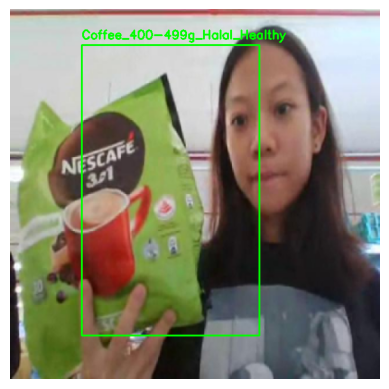

In [3]:
import matplotlib.pyplot as plt

# frame = vs.read()
frame = cv2.imread("2023_8_11_11_22_30_553933_png.rf.59102374c2520696d8fe64158b5ccb75.jpg")
frame = imutils.resize(frame, width=400)
orig = frame.copy()
# convert the frame from BGR to RGB channel ordering and change
# the frame from channels last to channels first ordering
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = cv2.resize(frame, (224, 224))
frame = frame.transpose((2, 0, 1))  
frame = torch.from_numpy(frame)
frame = transforms_test(frame).to(CONFIGS['DEVICE'])
frame = frame.unsqueeze(0)

# predict the bounding box of the object along with the class label
# Perform inference
(labelPreds_prdtype, labelPreds_weight, labelPreds_halal, labelPreds_healthy, boxPreds) = model(frame)

# Extract bounding box coordinates
(startX, startY, endX, endY) = boxPreds[0].detach().cpu().numpy()

# Extract and decode the labels for each attribute
# For ProductType
i_prdtype = labelPreds_prdtype.argmax(dim=-1).cpu().numpy()
label_prdtype = le_prdtype.inverse_transform([i_prdtype])[0]

# For Weight
i_weight = labelPreds_weight.argmax(dim=-1).cpu().numpy()
label_weight = le_weight.inverse_transform([i_weight])[0]

# For HalalStatus
i_halal = labelPreds_halal.argmax(dim=-1).cpu().numpy()
label_halal = le_halal.inverse_transform([i_halal])[0]

# For HealthStatus
i_healthy = labelPreds_healthy.argmax(dim=-1).cpu().numpy()
label_healthy = le_healthy.inverse_transform([i_healthy])[0]

# Combine the labels into a single string, if needed
label = f"{label_prdtype}_{label_weight}_{label_halal}_{label_healthy}"

# set label to nonfood if no match
if label not in all_categories:
    label = "Nonfood"
    print("1")
if label_prdtype == "Nonfood" or label_weight == "Nonfood" or label_halal == "Nonfood" or label_healthy == "Nonfood":
    label = "Nonfood"
    print("2")

print(label)

# resize the original image such that it fits on our screen, and grab its dimensions
orig = imutils.resize(orig, width=600)
# print(orig.shape)
(h, w) = orig.shape[:2]

# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)

# draw the predicted bounding box and class label on the image
y = startY - 10 if startY - 10 > 10 else startY + 10
cv2.putText(orig, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
  0.65, (0, 255, 0), 2)
cv2.rectangle(orig, (startX, startY), (endX, endY),
  (0, 255, 0), 2)

# # Display the image using OpenCV
# cv2.imshow("Predicted Image", orig)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(orig_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [14]:
import torch
import numpy as np

import torch.nn.functional as F

def get_top_two_probs_and_indices(tensor):
    # Convert logits to probabilities using softmax
    probs_tensor = F.softmax(tensor, dim=-1)
    # Get the values and indices of the top two probabilities
    top_two_probs, top_two_indices = torch.topk(probs_tensor, 2, dim=-1)
    return top_two_probs.detach().cpu().numpy(), top_two_indices.detach().cpu().numpy()  # Detach tensors before converting to numpy

def generate_labels_and_probs(top_two_probs, top_two_indices, label_encoders):
    # Generate all possible label combinations and their joint probabilities
    labels = []
    joint_probs = []
    for i in range(2):  # Loop over the top two probabilities for each sub-label
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    indices = [top_two_indices[0][0][i],  # Flatten the indices
                               top_two_indices[1][0][j], 
                               top_two_indices[2][0][k], 
                               top_two_indices[3][0][l]]
                    probs = [top_two_probs[0][0][i],  # Flatten the probabilities
                             top_two_probs[1][0][j], 
                             top_two_probs[2][0][k], 
                             top_two_probs[3][0][l]]
                    label = "_".join(encoder.inverse_transform([idx])[0] for idx, encoder in zip(indices, label_encoders))
                    joint_prob = np.prod(probs)  # Compute the joint probability
                    labels.append(label)
                    joint_probs.append(joint_prob)
    return labels, joint_probs


# Extract top two probabilities and indices for each sub-label
top_two_probs_and_indices = [get_top_two_probs_and_indices(tensor) for tensor in 
                             [labelPreds_prdtype, labelPreds_weight, labelPreds_halal, labelPreds_healthy]]

# Separate the probabilities and indices
top_two_probs, top_two_indices = zip(*top_two_probs_and_indices)

# Generate all possible label combinations and their joint probabilities
all_possible_labels, all_joint_probs = generate_labels_and_probs(top_two_probs, top_two_indices, 
                                                                [le_prdtype, le_weight, le_halal, le_healthy])

# Filter out the valid labels and their joint probabilities
valid_labels_and_probs = [(label, prob) for label, prob in zip(all_possible_labels, all_joint_probs) if label in all_categories]

# If there are no valid labels, set label to 'Nonfood'
if not valid_labels_and_probs:
    label = "Nonfood"
else:
    # Otherwise, pick the valid label with the highest joint probability
    label, _ = max(valid_labels_and_probs, key=lambda x: x[1])

# Additional check for 'Nonfood' sub-label
if any(sub_label == "Nonfood" for sub_label in label.split('_')):
    label = "Nonfood"

    
label

'Coffee_400-499g_Halal_Healthy'

In [15]:
top_two_probs_and_indices

[(array([[0.99123  , 0.0036534]], dtype=float32), array([[ 7, 21]])),
 (array([[0.9784896 , 0.00790418]], dtype=float32), array([[6, 7]])),
 (array([[9.9994648e-01, 5.2227442e-05]], dtype=float32), array([[0, 1]])),
 (array([[0.97838426, 0.02120721]], dtype=float32), array([[0, 1]]))]

In [16]:
all_joint_probs

[0.9488922,
 0.02056795,
 4.9560866e-05,
 1.074269e-06,
 0.007665099,
 0.00016614678,
 4.0034993e-07,
 8.677886e-09,
 0.0034973533,
 7.580776e-05,
 1.826676e-07,
 3.959457e-09,
 2.8251427e-05,
 6.123709e-07,
 1.4755789e-09,
 3.198428e-11]

In [17]:
all_possible_labels

['Coffee_400-499g_Halal_Healthy',
 'Coffee_400-499g_Halal_NonHealthy',
 'Coffee_400-499g_NonHalal_Healthy',
 'Coffee_400-499g_NonHalal_NonHealthy',
 'Coffee_500-599g_Halal_Healthy',
 'Coffee_500-599g_Halal_NonHealthy',
 'Coffee_500-599g_NonHalal_Healthy',
 'Coffee_500-599g_NonHalal_NonHealthy',
 'Oil_400-499g_Halal_Healthy',
 'Oil_400-499g_Halal_NonHealthy',
 'Oil_400-499g_NonHalal_Healthy',
 'Oil_400-499g_NonHalal_NonHealthy',
 'Oil_500-599g_Halal_Healthy',
 'Oil_500-599g_Halal_NonHealthy',
 'Oil_500-599g_NonHalal_Healthy',
 'Oil_500-599g_NonHalal_NonHealthy']